In [266]:
import cv2
from PIL import Image, ImageFilter
import numpy as np
from matplotlib import pyplot as plt
import copy
import os

In [267]:
image_path = './scan/'

img_list = os.listdir(image_path) #디렉토리 내 모든 파일 불러오기
img_list_jpg = [img for img in img_list if img.endswith(".jpg")] #지정된 확장자만 필터링

print ("img_list_jpg: {}".format(img_list_jpg))

img_list_jpg: ['Scan_20220714_111019_19.jpg']


In [268]:
img_list_np = []

for i in img_list_jpg:
    img = Image.open(image_path + i)
    img_array = np.array(img)
    img_list_np.append(img_array)
    print(i, " 추가 완료 - 구조:", img_array.shape) # 불러온 이미지의 차원 확인 (세로X가로X색)
    #print(img_array.T.shape) #축변경 (색X가로X세로)

Scan_20220714_111019_19.jpg  추가 완료 - 구조: (1123, 793, 3)


In [269]:
img_np = np.array(img_list_np) #리스트를 numpy로 변환
print(img_np.shape)

(1, 1123, 793, 3)


In [270]:
img_crop = []

for i in range(len(img_np)):
    img_crop = img_np[i][80:,150:]
    img_gray = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)
    
    thresh1 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 30)
    
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    img = copy.deepcopy(thresh1)
    img_contour = cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
    contour_pos = []
    # 면적이 
    for pos in range(len(contours)):
        area = cv2.contourArea(contours[pos])
        if area > 3000:
            contour_pos.append(pos)

    # 면적 부분 오려내기
    for pos in contour_pos:
        x, y, w, h = cv2.boundingRect(contours[pos])
        img_crop = img_temp[y:y + h, x:x + w]

        
    for p in contour_pos:
        img_temp = copy.deepcopy(thresh1)
        img_orig = copy.deepcopy(thresh1)
        x, y, w, h = cv2.boundingRect(contours[p])

        cnt = contours[p]
        area = cv2.contourArea(cnt)

        area_box = w*h

        img_contour = cv2.drawContours(img_orig, contours, p, (0, 255, 0), 1)

        cnt = contours[p]
        M = cv2.moments(cnt)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])

        # 좁게 추출
        # for i in range(y, y + h):
        #     px_lst = img_contour[i]
        #     for j in range(x, x + w):
        #         if (px_lst[j] == [0, 255, 0]).all():
        
        #             cv2.line(img_contour, (j, i), (cx, cy), (1, 2, 3), 2)

        # img_crop = img_contour[y:y + h, x:x + w]

        # 배경 날리기
        for i in range(y, y + h):
            px_lst = img_contour[i]
        

        img_save = img_temp[y:y + h, x:x + w]
        img_save = img_save[1:85,10:100]
        cv2.imwrite("./test5/image{}.png".format(p), img_save)

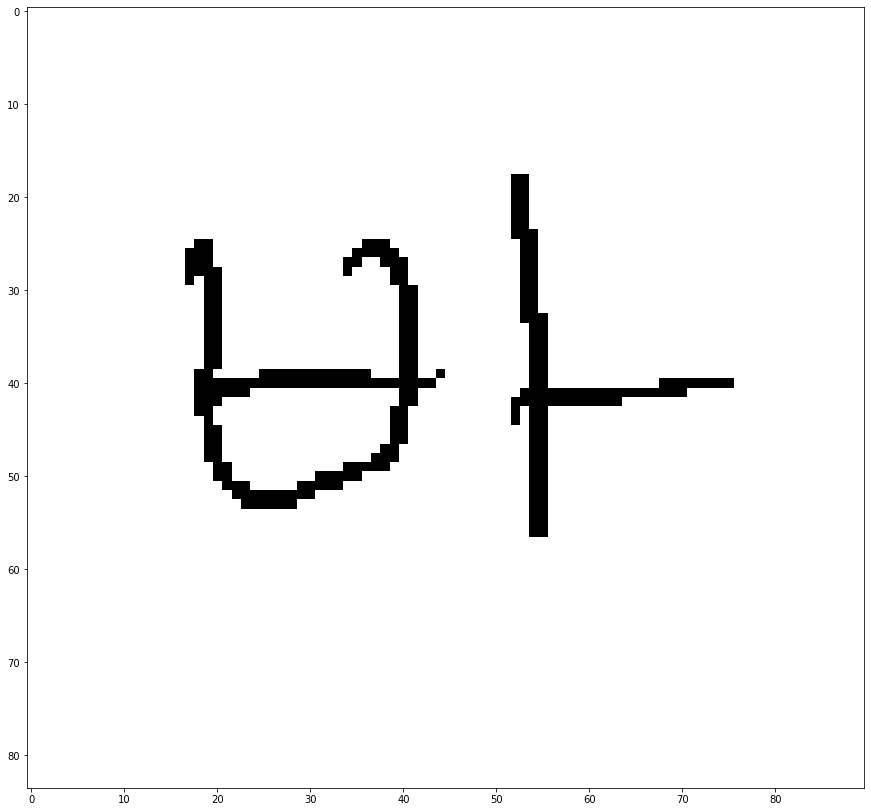

In [272]:
img_original = cv2.imread('./train/img/ba (1).png')
plt.figure(figsize = (15, 15))
plt.imshow(img_original)

In [273]:
img_original

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]